In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats
!mkdir Dataset

100% 1.06G/1.06G [00:11<00:00, 158MB/s]
100% 1.06G/1.06G [00:11<00:00, 100MB/s]


In [ ]:
!unzip -q /content/dogs-vs-cats.zip -d /content/Dataset
!rm /content/dogs-vs-cats.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
#generators
training_data = "/content/Dataset/train"
testing_data = "/content/Dataset/test"

training_dataset = keras.utils.image_dataset_from_directory(
    training_data,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

validation_dataset = keras.utils.image_dataset_from_directory(
    testing_data,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalization to make every pixel value between 0 and 1
# map function take one image and its label from the dataset and input to the function and function transform it and store again in the dataset

def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label
training_dataset = training_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape= (256,256,3)),
    MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'),

    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'),

    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(training_dataset, epochs = 10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 68s 96ms/step - loss: 0.6024 - accuracy: 0.6627 - val_loss: 0.5346 - val_accuracy: 0.7272
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4706 - accuracy: 0.7748 - val_loss: 0.4635 - val_accuracy: 0.7872
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3721 - accuracy: 0.8313 - val_loss: 0.4844 - val_accuracy: 0.7888
Epoch 4/10
625/625 [==============================] - 51s 82ms/step - loss: 0.2494 - accuracy: 0.8926 - val_loss: 0.5677 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1347 - accuracy: 0.9474 - val_loss: 0.7483 - val_accuracy: 0.8064
Epoch 6/10
625/625 [==============================] - 51s 80ms/step - loss: 0.0812 - accuracy: 0.9701 - val_loss: 0.8519 - val_accuracy: 0.7956
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0654 - accuracy: 0.9776 - val_loss: 0.9601 - val_accuracy:

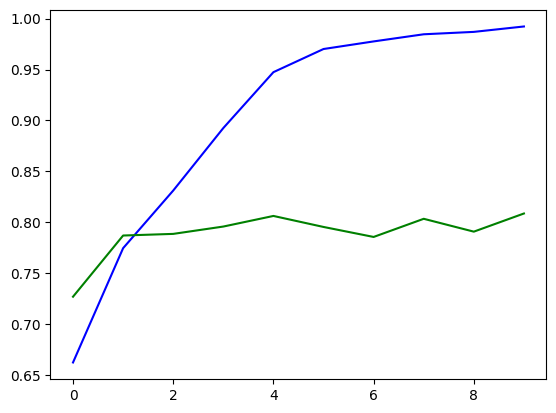

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'training_accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy', color = 'green')

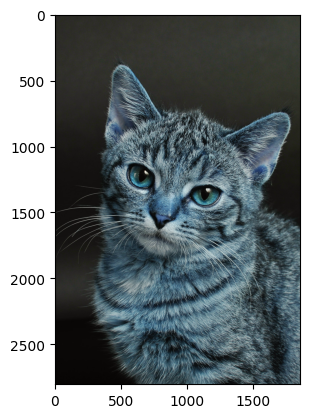

In [ ]:
import cv2
test_image = cv2.imread('/content/pexels-wojciech-kumpicki-2071882.jpg')
plt.imshow(test_image)

In [ ]:
test_img = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
pred = model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred

array([[0.]], dtype=float32)

In [ ]:
if pred == 0:
  print("Model says it is a cat")
else:
  print("Model says it is a dog")

Model says it is a cat


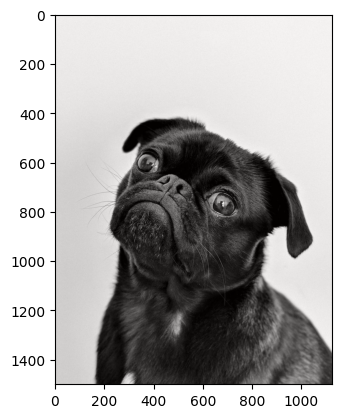

In [ ]:
test_image = cv2.imread('/content/pexels-photo-1851164.jpeg')
plt.imshow(test_image)

In [ ]:
test_img = cv2.resize(test_image,(256,256))

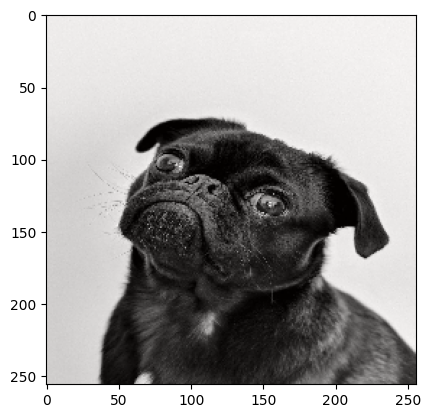

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
pred = model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


In [ ]:
pred

array([[1.]], dtype=float32)

In [ ]:
if pred == 0:
  print("Model says it is a cat")
else:
  print("Model says it is a dog")

Model says it is a dog
